In [21]:
import os

if "src" in os.getcwd():
    os.chdir("../")

from pathlib import Path

## Академия Аналитиков Авито 2024-2025

## Семинар по Audio Processing

**Цель**: познакомиться с инструментами обработки звука. Воспользоваться моделью **Whisper** для решения задачи распознавния речи.

**Преимущества**:

- универсальность -- распознавание на 90+ языков; хорошо обобщается на данные разной природы т.к. видел много разнообразных данных на трейне
- многозадачность -- помимо задачи ASR умеет распознавать язык, определять границы речевых сегментов, переводить на английский
- для достойного качества не **нужно больших объемов данных** для дообучения


### Содержание
1. Аудио
2. Аугментации
3. Дообучение
4. Домашнее задание

### **Часть 1. Как мы работаем с аудио**

Узнаем, как познакомиться с изучаемым звуком, на что влияет частота дискретизации и как именно мы извлекаем признаки для дальнейшего анализа.

В коде ниже проводится подготовка к разделу.

In [22]:
import torchaudio
import matplotlib.pyplot as plt
from IPython.display import display, Audio

In [23]:
def visualize_audio(audio_path: Path):
    wav, sr = torchaudio.load(audio_path)

    print(f"Sample rate: {sr}")
    print(f"Num samples: {wav.shape[-1]}")
    print(f"Duration: {round(wav.shape[-1] / sr, 3)}")

    plt.figure(figsize=(12, 4))
    for channel in range(wav.shape[0]):
        plt.plot(wav[channel], alpha=0.7, label=f"channel {channel}")
    plt.grid()
    plt.xlabel("Time, samples", size=10)
    plt.ylabel("Amplitude, ", size=10)
    plt.legend()
    plt.show()
    display(Audio(data=wav, rate=sr))

#### Чтение аудио

При чтении аудио-файла любой доступный фреймворк вернёт вам два значения: сами акустические данные и значение частоты сэмплирования. Это минимум, необходимый для описания одного файла.

**Частота сэмплирования** показывает, сколько значений звукового сигнала (сэмплов) содержится в одной секунде оригинального звука.<br>Иными словами -- это показатель, который помогает нам отобразить порядковые значения сэмплов на оригинальную ось времени.

Вот, как мы читаем звук с помощью `torchaudio`.

In [25]:
AUDIO_DIR = Path("./data/audio")

# wav -- torch.Tensor из акустических сэмплов; sr -- sample rate, частота сэмплирования
wav, sr = torchaudio.load(AUDIO_DIR / "123_hello_mono.wav")

wav.shape, sr

(torch.Size([1, 111014]), 44100)

#### Канальность

Из вывода от предыдущей ячейки мы видим, что в тензоре, хранящем акустические сэмплы, есть две оси: **ось каналов** и **ось сэмплов (времени)** соответственно.

Сейчас в оси каналов стоит число 1 -- это из-за того, что аудио у нас записано в формате моно.

В природе встречается три типа аудио-файлов (по числу каналов): 
1. Моноканальные -- такие записи скорее всего записывали на единственный микрофон, из-за чего в файле содержится всего одна акустическая дорожка.
2. Стереоканальные -- в зависимости от применения, в разные каналы кладётся разный звук (в музыклаьной звукозаписи -- для создания объемного звучания, в телефонии контактных центров -- для разделения звонящего и абонента)
3. Многоканальные -- самый редкий зверь. Встречается в конкретных узких областях (кино, домашние кинотеатры, видеоигры).

Давайте визуализируем наше моноканальное аудио:

Sample rate: 44100
Num samples: 111014
Duration: 2.517


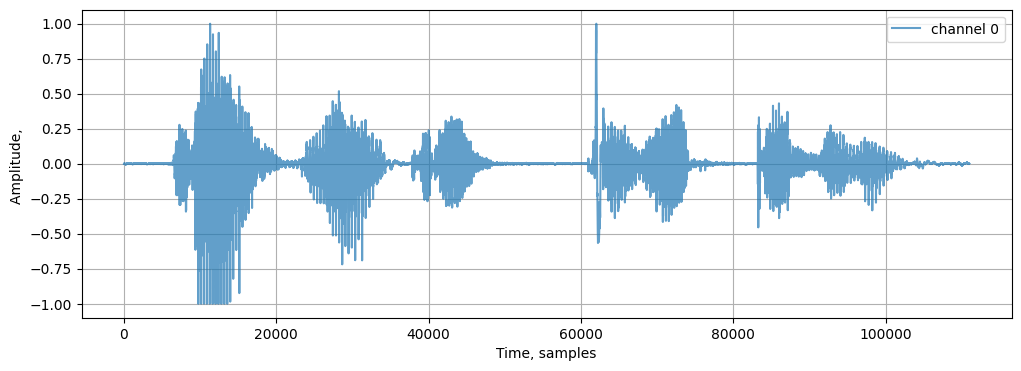

In [19]:
visualize_audio(AUDIO_DIR / "123_hello.wav")

А вот, как выглядит звук в формате стерео:

In [28]:
# Тут код визуализации стерео
# Можно вставить кейс с песнями биттлз

Тут мы видим два речевых сигнала...

#### А если я не хочу писать код?

In [30]:
# Тут описываю mediainfo